<a href="https://colab.research.google.com/github/SisiDzy/Machine-Learning/blob/main/ML_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  Import the spam dataset and print the first six rows.  

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

d = pd.read_csv("spam_dataset.csv")
d.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


2.  Read through the documentation of the original dataset here:

   http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

   The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I think "word_freq_free:", "char_freq_!:", and "capital_run_length_total:" will be important predictors in a model of spam. "word_freq_free:", as the word frequency of "free", is important because "free" is an appealing word for potential customers, and spam emails may use the word frequently to entice recipients with promises of free products, services, or offers. "char_freq_!:", as the character frequency of "!", is essential to use since the character is just used to grab people's attention, which is a good choice for spam emails. Legitimate emails, in comparison, are less likely to use "!". "capital_run_length_total:", as the total number of capital letters, could also be a useful predictor because spam emails may use excessive capitalization to create a sense of urgency or emphasis.

3.  Visualize the univariate distribution of each of the variables in the previous question.  

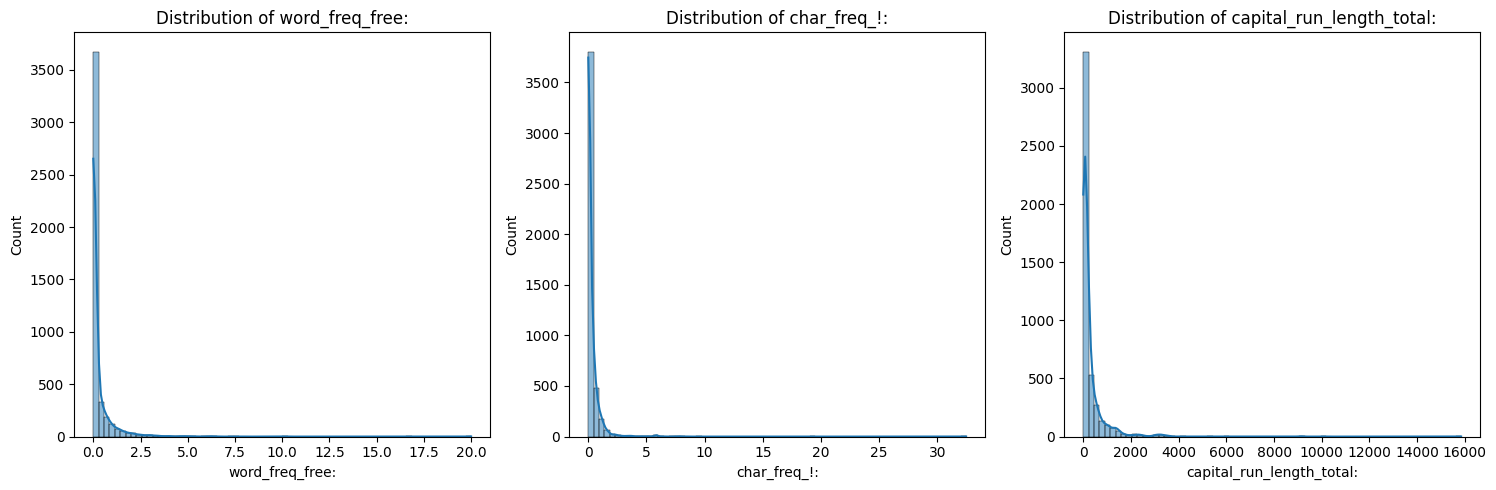

In [ ]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(["word_freq_free:"] + ["char_freq_!:"] + ["capital_run_length_total:"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(d[var], kde=True, bins=70)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

1. Logistic Regression
2. KNN for Classification
3. Support Vector Machines (SVMs)
4. Random Forests
5. Decision Trees
6. Gradient Boosting
7. Bagging

5. Describe the importance of training and test data.  Why do we separate data into these subsets?

The training data is used to educate models by enabling them to learn patterns and relationships within the data. In contrast, the test data is essential for evaluating a model's performance, preventing overfitting, and ensuring that the model generalizes well to new, unseen data. By keeping these subsets distinct, we can tune models and select the best-performing parameters, ensuring robust and unbiased models.

6. What is k-fold cross validation and what do we use it for?

K-fold cross-validation is a technique for robust model evaluation. It involves splitting the dataset into k subsets, using k-1 subset for testing and the remaining subsets for training, and then using k-2 subset for testing and the remaing ing subsets for training, and so on. This approach provides a comprehensive evaluation by averaging performance metrics across iterations, making it more reliable in building models that generalize well. It is essential for hyperparameter tuning and is particularly valuable when working with limited data.

7. How is k-fold cross validation different from stratified k-fold cross validation?

In K-fold cross-validation, the data is randomly partitioned into k subsets, which can lead to imbalances in class distribution among the folds. Stratified K-fold, on the other hand, makes sure that each fold maintains the same class distribution as the original dataset, and provides a more reliable assessment of model performance when dealing with imbalanced datasets where one class is significantly smaller than the others.

8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = d[["word_freq_free:", "char_freq_!:", "capital_run_length_total:"]]
y = d["spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_logreg = LogisticRegression(C=best_params['C'], max_iter=10000)
best_logreg.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_logreg.score(X_test, y_test)))

kfold = KFold(n_splits=5)
print("Cross validation score: {:.3f}".format(cross_val_score(best_logreg, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'C': 100}
Training set score: 0.778
Test set score: 0.769
Cross validation score: 0.776


I chose C=100 since it was selected as the best parameter by GridSearchCV. I chose the default penalty (l2) to help prevent overfitting. And I set max_iter=10000 to prevent overwhelming warnings and also for best coefficients.

9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=2)

param_grid = {'n_estimators': [100, 200, 300, 500, 800, 1000]}

grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'])
best_forest.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_forest.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_forest.score(X_test, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_forest, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'n_estimators': 800}
Training set score: 0.963
Test set score: 0.859
Cross validation score: 0.859


I chose n_estimators=800 since Random Forests perform better when n_estimators is greater and GridSearchCV selected it as the best parameter. Here, Random Forests predicts test data better than Logistic Regression, with a test set score of 0.859.

10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knc = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_knc = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knc.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(best_knc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(best_knc.score(X_test_scaled, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_knc, X_train_scaled, y_train, cv=kfold).mean()))

Best parameter(s): {'n_neighbors': 3}
Training set score: 0.894
Test set score: 0.840
Cross validation score: 0.843


I chose n_neighbors=3 since GridSearchCV selected it as the best parameter. Here, I did scaling because through previous assignments, I found scaling is crucial for KNN to make a better prediction. KNN for Classification after scaling has a better result than Logistic Regression but has a lower score than Random Forests.

11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=estimator, random_state=2)

param_grid = {'n_estimators': [100, 200, 300, 500, 800, 1000]}

grid_search = GridSearchCV(BaggingClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_bag = BaggingClassifier(n_estimators=best_params['n_estimators'])
best_bag.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_bag.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_bag.score(X_test, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_bag, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'n_estimators': 100}
Training set score: 0.963
Test set score: 0.854
Cross validation score: 0.853


I chose n_estimators=100 since GridSearchCV selected it as the best parameter. Bagging predicts test data better than all other models except for Random Forests.

12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

In [ ]:
X = d[["word_freq_free:", "char_freq_!:", "capital_run_length_total:", "word_freq_remove:", "char_freq_$:", "capital_run_length_average:"]]
y = d["spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestClassifier(random_state=2)

param_grid = {'n_estimators': [100, 200, 300, 500, 800, 1000]}

grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'])
best_forest.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_forest.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_forest.score(X_test, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_forest, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'n_estimators': 500}
Training set score: 0.992
Test set score: 0.918
Cross validation score: 0.915


This Random Forests model with six variables predicts test data better than all previous models, with a test set score as high as 0.918.

13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_logreg = LogisticRegression(C=best_params['C'], max_iter=10000)
best_logreg.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_logreg.score(X_test, y_test)))

kfold = KFold(n_splits=5)
print("Cross validation score: {:.3f}".format(cross_val_score(best_logreg, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'C': 100}
Training set score: 0.862
Test set score: 0.853
Cross validation score: 0.859


In [ ]:
param_grid = {'n_estimators': [100, 200, 300, 500, 800, 1000]}

grid_search = GridSearchCV(BaggingClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_bag = BaggingClassifier(n_estimators=best_params['n_estimators'])
best_bag.fit(X_train, y_train)

print("Training set score: {:.3f}".format(best_bag.score(X_train, y_train)))
print("Test set score: {:.3f}".format(best_bag.score(X_test, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_bag, X_train, y_train, cv=kfold).mean()))

Best parameter(s): {'n_estimators': 500}
Training set score: 0.992
Test set score: 0.912
Cross validation score: 0.914


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best parameter(s): {best_params}")

best_knc = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knc.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(best_knc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(best_knc.score(X_test_scaled, y_test)))
print("Cross validation score: {:.3f}".format(cross_val_score(best_knc, X_train_scaled, y_train, cv=kfold).mean()))

Best parameter(s): {'n_neighbors': 13}
Training set score: 0.906
Test set score: 0.879
Cross validation score: 0.900


I choose Random Forests as my final model because it has the highest test set score (0.918) and cross validation score (0.915) among four models, but bagging is also a great choice with a test set score of 0.912 and a cross validation score of 0.914.

14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I think if the variable "word_freq_now:" exists, it can increase my final model's predictive power, because spam emails tend to appeal receivers to take action as soon as possible, and the word "now" is highly possible to be used for this reason in spam emails.

15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.

1. Linear Regression (OLS)
2. KNN for Regression
3. Support Vector Machines (SVMs)
4. Lasso Regression
5. Ridge Regression
6. Decision Trees
7. Bagging
8. Random Forests
9. Gradient Boosting